<a href="https://colab.research.google.com/github/dlskawns/Engineering_algorithm/blob/main/spark_installation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pyspark colab에서 활용하기  

https://heekangpark.github.io/hadoop/colab-pyspark

* AWS 콘솔 웹사이트를 통해 EC2 인스턴스를 생성
* SSH 또는 secure shell을 통해 EC2에 연결 -> 윈도우, 맥, 리눅스에서 모두 다른 환경을 지님
* 연결 후 스파크 / 주피터노트북을 EC2 인스턴스에 설정


### 인스턴스 생성하기

* 로그인 후 서비스에서 EC2를 찾아서 들어간 뒤, 인스턴스 생성 클릭

* name and tag에서 적당히 key 와 value 값 입력

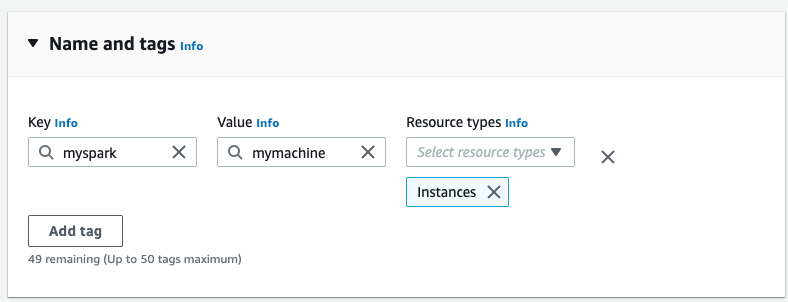

* AMAZON Machine Image를 선택한다. -> 머신 이미지는 우리가 설정하는 가상 컴퓨터에서 원하는 운영체제를 의미



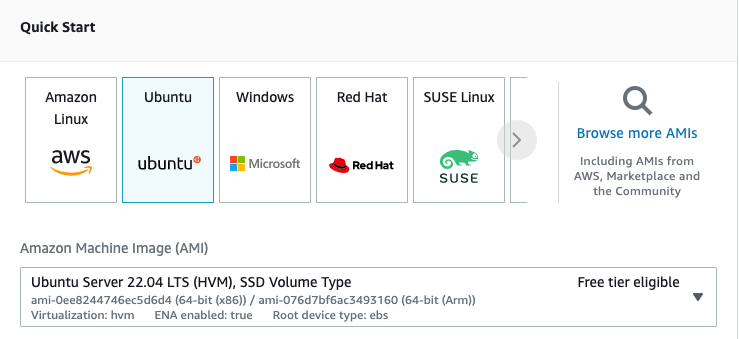

우분투를 선택하고, 하단에 반드시 Free tier eligible이 되어있는지 확인

* 인스턴스 타입 란에서는 t2.micro를 선택 -> 무료중에 그나마 나은 것

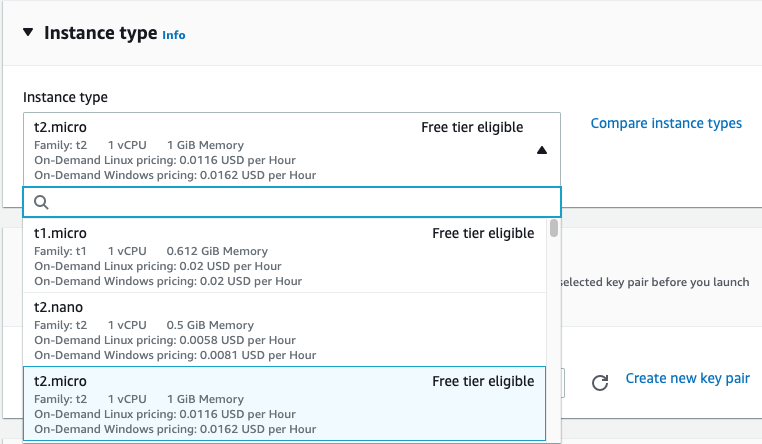

* 우측의 Summary 상에서 인스턴스 개수를 1로 둔다.

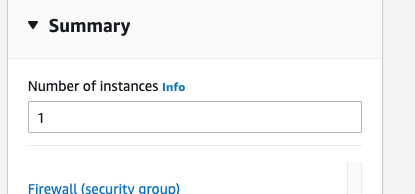

* Network Settings 의 Edit 클릭



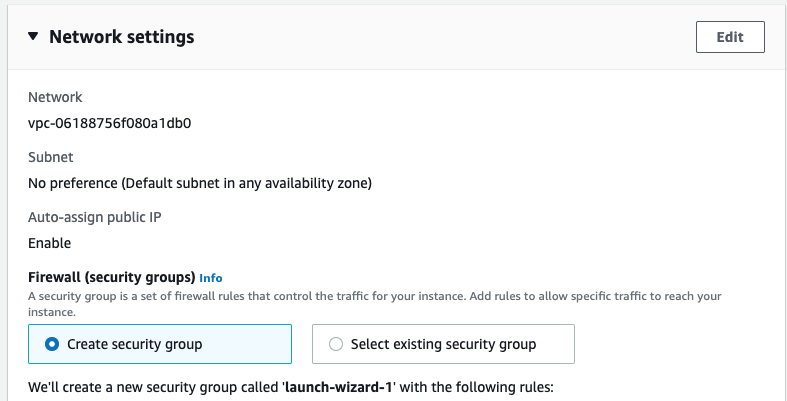

* type을 SSH에서 all traffic으로 변경

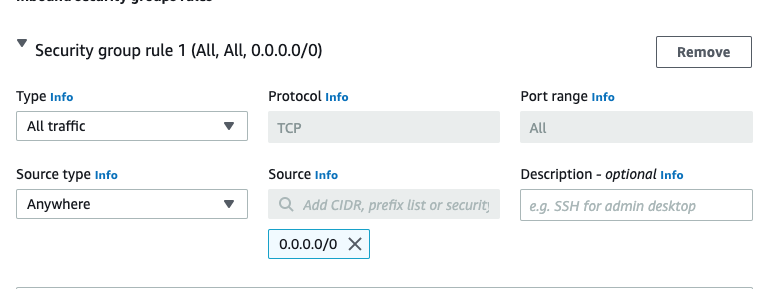

* Launch 하게되면, key pair 설정을 하게 됨
* create a new key pair 선택
* key pair name 작성
* .pem으로 받기 

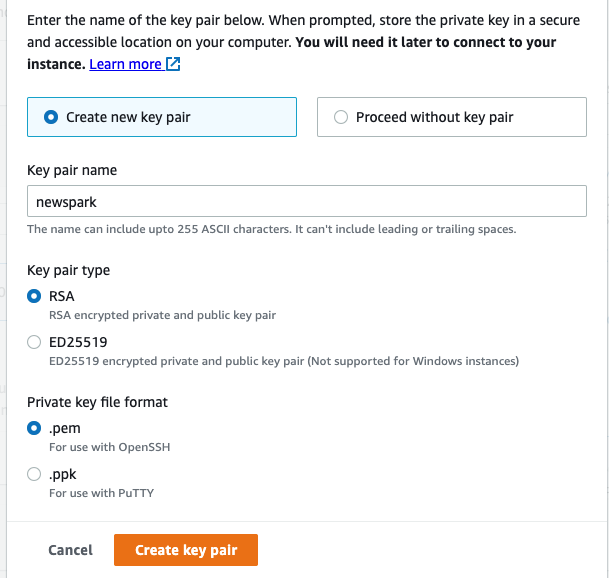

* create key pair를 클릭하면 팝업이 종료되고, .pem이 다운로드 됨 

* 이후 Launch 다시 클릭하면 인스턴스 생성됨

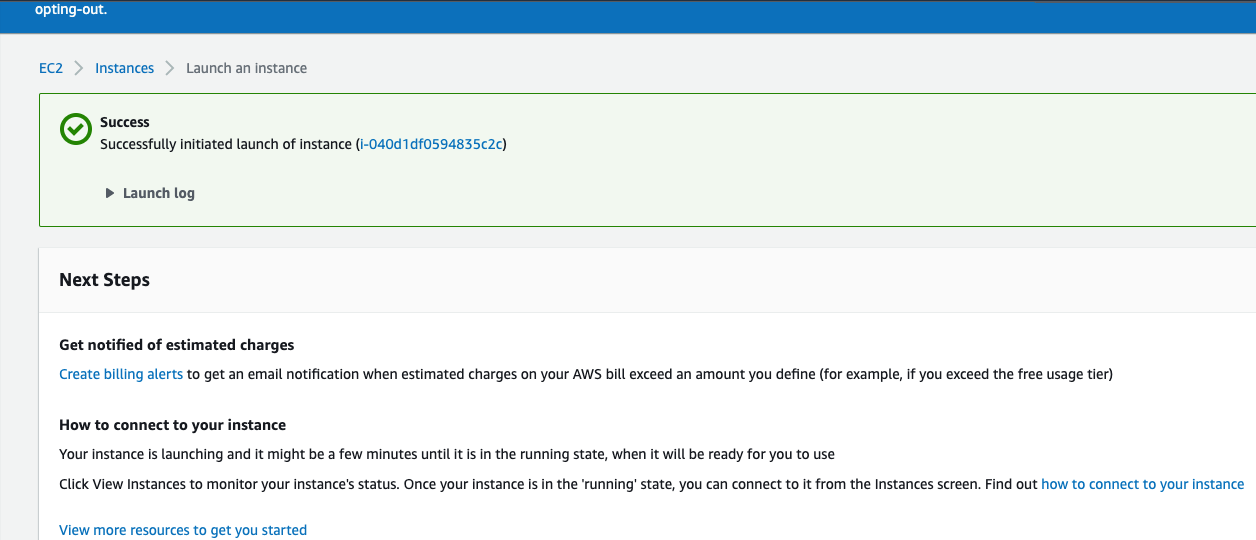

* 인스턴스 ID, 퍼블릭 DNS 등 중요한 정보가 있는 것을 확인할 수 있음

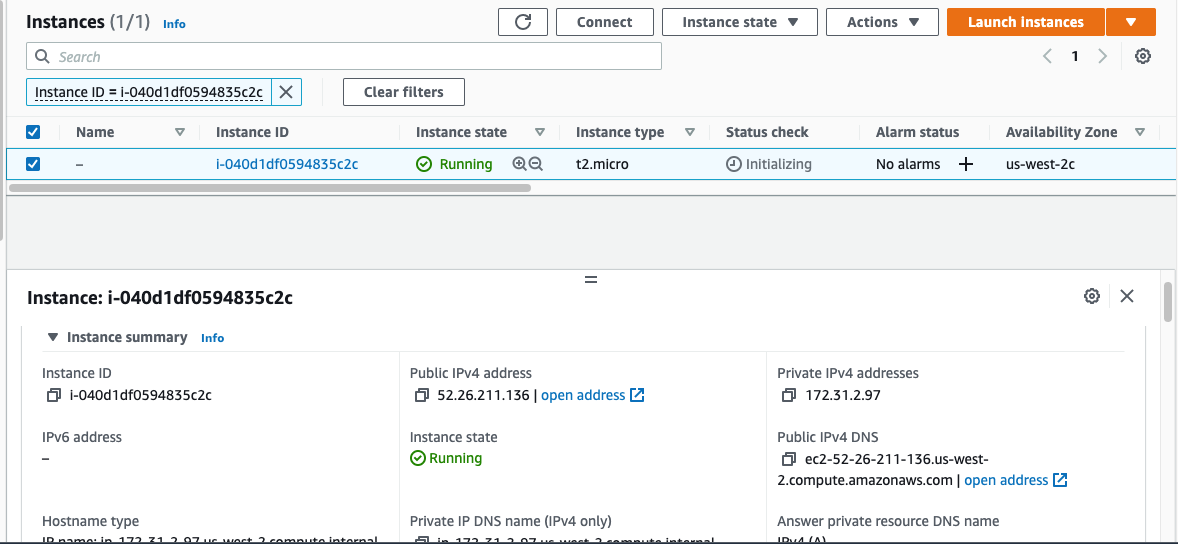

* instance의 사용이 종료되면 반드시 instance state에서 terminate를 해주어야 한다.
* 참고로 프리티어는 12개월동안 한달에 750시간을 준다 -> 한달 내내 실행 가능하며, 작업이 끝났을 때 종료해야함
* 맥과 리눅스를 사용할 경우 여기까지만 진행해도 인스턴스를 끝낼 수 있다. 

### Secure Shell을 이용해 터미널을 통해 인스턴스 연결하기

* 터미널을 켜고 chmod 명령어를 사용해 프라이빗 키 파일이 퍼블릭에서 보이지 않도록 할 것
  * newspark.pem 파일을 데스크톱으로 위치변경 할 것
  * 터미널에서 cd Desktop 입력 엔터 으로 경로 이동
  * chmod 400 newspark.pem 입력 엔터
  * ssh -i newspark.pem ubuntu@DNS 입력 엔터 후 yes 입력 엔터
  * ~~(연결 종료시) sudo yum remove ec2-instance-connect~~

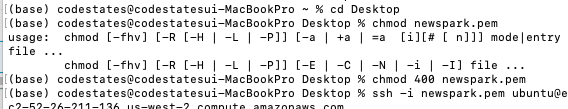

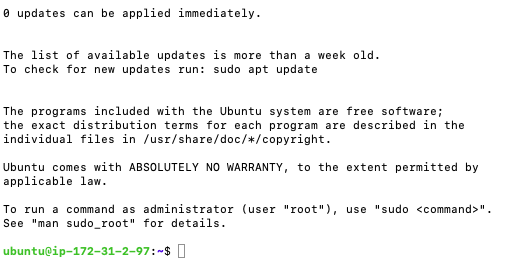

완료가 되면 ubuntu@ip 주소의 형식으로 CLI에 확인이 된다.  
또한 EC2 인스턴스에 대한 명령행 인터페이스가 된다.

### 파이썬 연결하기

* 스파크와 스파크 관련 모든 부속을 다운받고 설치
* 주피터 설치
* 파이스파크 연결
* 로컬 브라우저에서 EC2 주피터 노트북 연결



* 연결 상태에서 sudo apt-get update 입력
  * 파이썬에서 pip3와 같은 것을 설치하기 위한 업데이트
* sudo apt install python3-pip 입력 , Y 입력
* pip3 install jupyter 입력
* sudo apt install jupyter-core

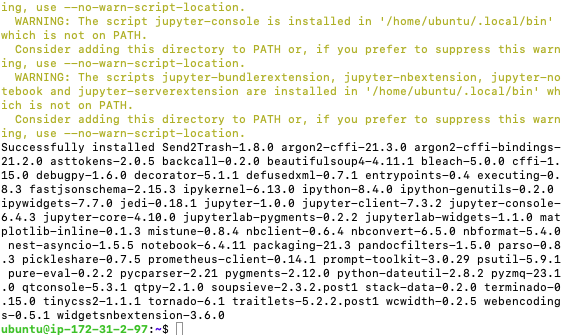

* 자바가 없는 경우를 위해 자바를 설치
  * sudo apt-get install default-jre 입력 , Y 입력
  * 스파크 설치를 위해 Scala 언어가 필요하고, Scala 언어를 위해 Java가 필요하기 때문
* 위와 비슷하게 스칼라를 설치
  * sudo apt-get install scala , Y 입력
* 파이썬을 자바와 연결하기 위해 필요한 py4j 설치
  * pip3 install py4j 입력
* 스파크를 설치
  * 22.07.05 현재 spark-3.3-bin-hadoop3 최신
    * 참고 https://www.apache.org/dyn/closer.lua/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
    * (최신) wget https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
    * (이전) wget http://archive.apache.org/dist/spark/spark-2.1.1/spark-2.1.1-bin-hadoop2.7.tgz -> wget http://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
  * 버젼은 추후에도 바꿀 수 있다. 
  * tgz파일은 받고 나면 압출을 풀 수 있음
    * sudo tar -zxvf spark-3.3.0-bin-hadoop3.tgz 입력
  * ls를 입력해 spark 압축풀어진 폴더를 확인하고, 해당 폴더로 cd를 한다.
    * cd spark-3.3.0-bin-hadoop3/
    * 이후 pwd를 입력해서 작업 디렉토리로 이동 -> spark로 주피터 노트북을 사용할 때 필요한 중요 파일 경로가 표시됨 ex: home/ubuntu/spark-3.3.0-bin-hadoop3
  * cd 입력하여 경로를 되돌린 뒤, pip3 install findspark를 입력
    * 스파크 모듈을 찾아내 파이썬과 스파크의 연결을 쉽게 해줌
  * jupyter notebook --generate-config 입력
    * 이때 jupyter-core를 install 하라는 내용이 나온다면 설치를 하고 jupyter도 설치해본다. http://www.wontree.net/board/340b960b-af5b-11ea-8bd5-0a68fbfeb10e/view/241 참고
    * jupyter-notebook not found가 뜨면 설치 경로를 못찾는 것일 수도 있으니, source ~/.profile를 입력해 해결한다.
    * 이렇게 함으로써 home/ubuntu/.jupyter/ 폴더 내에 jupyter_notebook_config.py파일을 생성한다. 
  * cd 입력 후, mkdir certs 입력으로 certs(검증을 의미) 폴더 만든 뒤, cd certs로 이동 
    * sudo openssl req -x509 -nodes -days 365 -newkey rsa:1024 -keyout mycert.pem -out mycert.pem 입력
      ->  주피터 환경설정에 사용할 .pem 파일을 만드는 것
      -> 이후 국가와 주소 등 인증서를 만드는 창이 나옴, 그냥 엔터 시 빈칸으로 설정되고 상관없음
  
  * cd ~/.jupyter 입력하여 이동한 뒤, vi jupyter_notebook_config.py 입력
    * 실제 해당 파일이 열리게 되고, 다른 컬러로 주석이 처리 되게 된다.
    

  


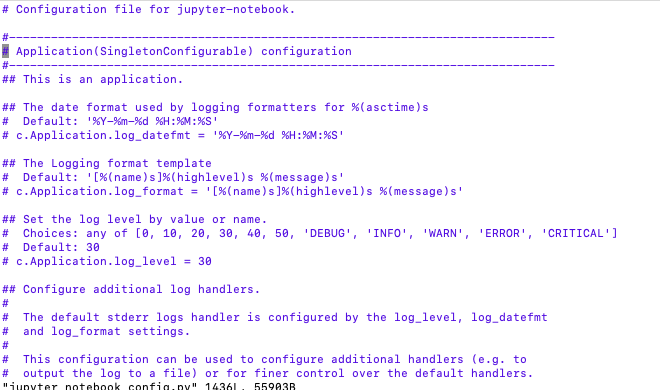

* 위 상탱서 'i'를 누르면 'insert' 표시와 함께 입력이 허용됨
  * c = get_config(). 
  * c.NotebookApp.certfile = u'/home/ubuntu/certs/mycert.pem'
    * 인증서 파일이 해당 위치에 있음을 알리는 문자열
  * c.NotebookApp.ip = '*' 
    * 인스턴스의 모든 ip 주소로 실행하라는 의미
  * c.NotebookApp.open_browser = False
    * 노트북을 여는 것을 default로 두지 않음
  * c.NotebookApp.port = 8888
    * 포트 번호 설정
  * esc를 통해 입력 위치 벗어난 뒤, :wq!를 입력
    * 위 추가한 내용이 config file에 추가된다.
  
  


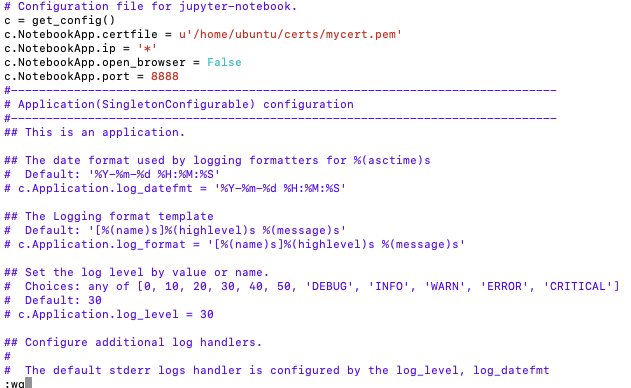

* port를 이미 사용하고 있어서 잘 안되는 경우도 있다.
  * ubuntu의 포트 확인 방법
    * netstat -lntp lgrep 8888 (8888 인것 보기)
    * netstat -tnlp | grep "LISTEN"
    * netstat 없다고 나오는 경우, sudo apt-get install net-tools 입력하여 설치
    

  * Jupyter를 켜는데 Permission error가 나는 경우
    * sudo chown을 이용해 권한을 변경해준다.
    * sudo chown $USER:$USER /home/ubuntu/certs/mycert.pem
    

* Jupyter를 켜는데 ssl.SSLError가 나는 경우
  * ssl.SSLError: [SSL: EE_KEY_TOO_SMALL] ee key too small (_ssl.c:3874) 일 경우
  * RSA를 2048로 바꿔서 진행
  


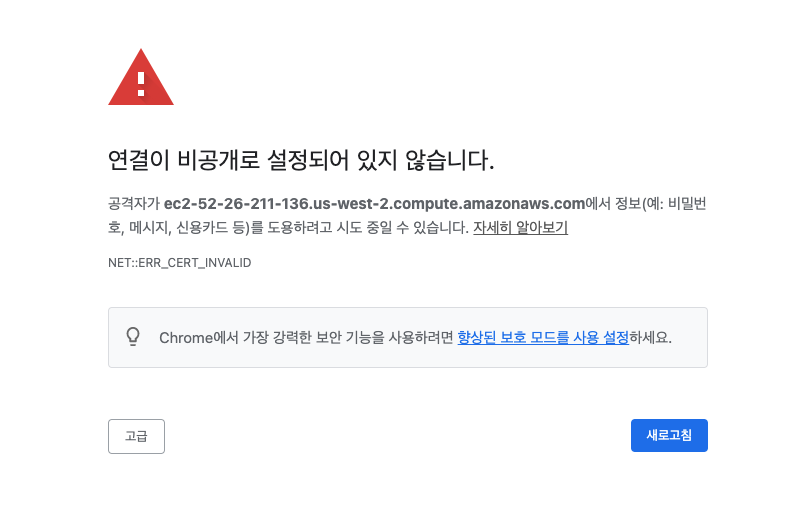

위와 같이 나오는 경우 로컬에서 인증서를 만들어 넣었기 때문에 발생
* 보통의 경우 고급을 누르면 URL(안전하지 않음)과 같이 링크가 주어지는데, 나오지 않는 경우가 있음
* 나오지 않는 경우 영문으로 된 것을 확인한 후 브라우저 내 아무곳이나 클릭, keyboard로 thisisunsafe를 입력하면 자동으로 이동이 된다.
  * 출처: https://velog.io/@jereint20/bypass-sslerrorpage

* sudo get install pipenv

* 우분투에 파이썬 3.7 설치 링크: https://somjang.tistory.com/entry/PythonUbuntu%EC%97%90-Python-37-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0

* 가상환경 커널 추가 링크: https://heytech.tistory.com/324

* 가상환경으로 해결이 되지 않음으로 최종적으로 spark 버젼을 최신화함 (3.2.1)
  * from collections import MutableMapping -> from collections.abc import ~~

### 데이터셋 우분투를 통해 EC2에 업로드

* scp -i newspark.pem people.json ubuntu@ec2-54-202-43-178.us-west-2.compute.amazonaws.com:/home/ubuntu/scp 입력
  * scp -i [pem 경로] [전송하려는 파일 경로] 사용자@DNS:[받을 경로]
  * pem 경로에 파일을 넣어두면 전송이 원활해진다.
  * 참고 https://m.blog.naver.com/jogilsang/222155767516
  * 참고(디렉토리 이동방법) https://wooono.tistory.com/5

### 쿼리를 사용할 때의 오류 해결

* 테이블 생성 후에 select 실행 시 Analysis Exception 발생
  * spark.sql('select * from 테이블명) 에서 오류 발생
  * AnalysisException: Table or view not found: people; line 1 pos 14;'Project [*] +- 'UnresolvedRelation [people], [], false
  * select * from global_temp.테이블명으로 입력 변경

* 참고 https://docs.microsoft.com/en-us/azure/databricks/kb/sql/global-temp-view-not-found

pyspark 문법 참고: https://eyeballs.tistory.com/443

* how to drop multiple columns in pyspark 
  * https://sparkbyexamples.com/pyspark/pyspark-drop-column-from-dataframe/

* equivalent with value_counts() of pandas in pyspark
  * https://stackoverflow.com/questions/51063624/whats-the-equivalent-of-pandas-value-counts-in-pyspark

* how to use and what is 'when' in pyspark -> like if
  * https://eyeballs.tistory.com/443

* how to check the missing value's count of columns in pyspark dataframe
  * https://www.datasciencemadesimple.com/count-of-missing-nanna-and-null-values-in-pyspark/

* how to calculate correlation between columns in pyspark
  * df.corr(col1, col2)
  * https://us-west-2.console.aws.amazon.com/ec2/v2/home?region=us-west-2#Instances:sort=instanceId

* Example of using StringIndexer / OneHotEncoding
  * https://knight76.tistory.com/entry/spark-%EB%A8%B8%EC%8B%A0-%EB%9F%AC%EB%8B%9D-StringIndexer-%EC%98%88

* String columns split way
  * https://sparkbyexamples.com/pyspark/pyspark-convert-string-to-array-column/

* How to split array in a column to two columns
  * https://stackoverflow.com/questions/45254928/how-to-extract-an-element-from-a-array-in-pyspark

* Extracting an element in array of col
  * https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.functions.element_at.html

파이스파크 상에선 그래프(plot)를 지원하고 있진 않지만, collect()를 통해 배열객체를 바탕으로 plot 라이브러리 활용

* Clustering computeCost 대신 ClusteringEvaluator 이용
  * https://stackoverflow.com/questions/65195312/kmeansmodel-object-has-no-attribute-computecost-in-apache-pyspark

### 스파크 스트리밍
라이브 데이터 스트림의 확장 가능하고 고효율에 고장 방지 처리를 가능케 하는 코어 스파크 API의 확장 버전  
  -> 이 전에 적재된 데이터를 활용했다면, 실제 라이브 데이터를 받아들이는 작업을 수행함.

#### 데이터를 받는법
* Kafka
* Flume
* Kinesis  
외에 TCP 소켓에서 받아들일 수 있음.

map, reduce, join, window와 같이 수준 높은 기능으로 표현되는 복잡한 알고리즘을 활용한다.




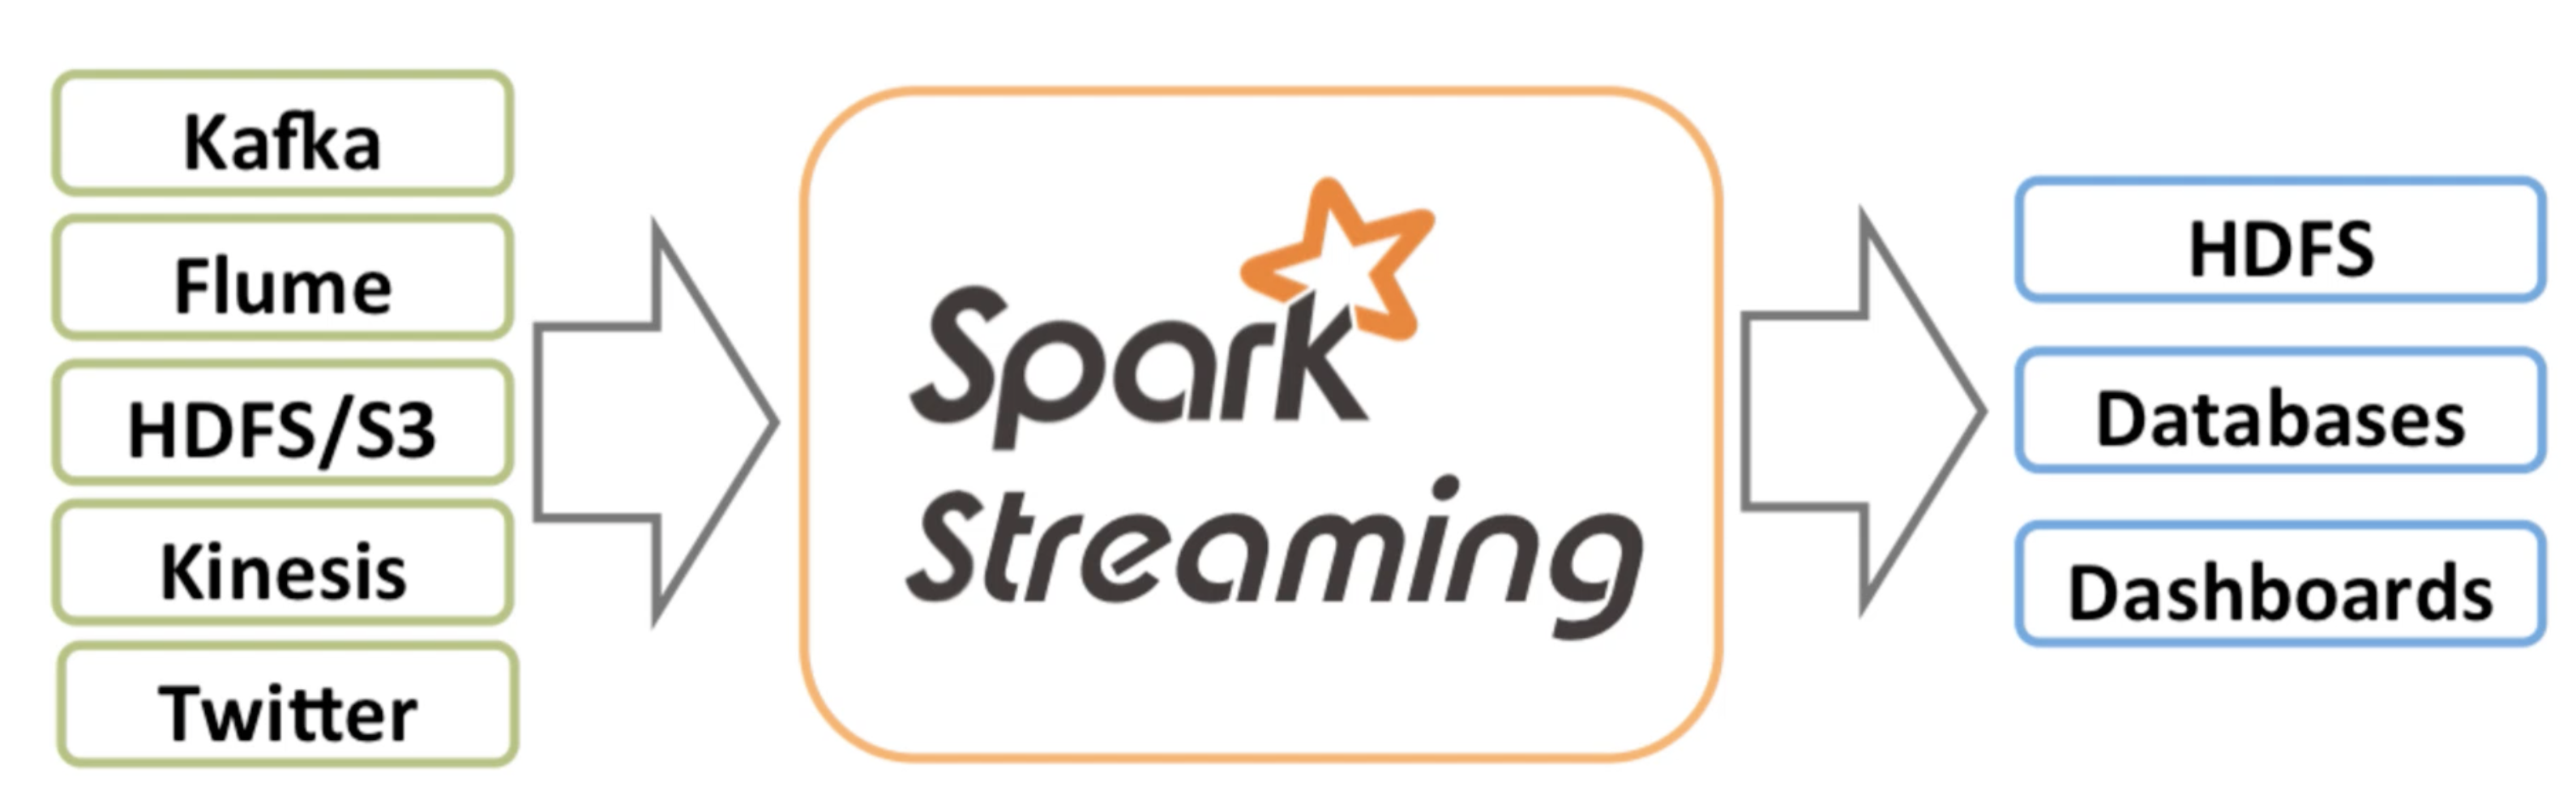

* 위 그림에서 왼쪽의 녹색이 스트리밍되는 라이브 데이터로써 오픈소스 라이브러리에 가깝다.

* 왼쪽의 데이터소스와 상관없이 스파크 스트리밍은 HDFS, DB, Dashboards 등으로 출력해 라이브 피드를 보여준다.





#### Virtual Box 설치

* https://www.virtualbox.org/wiki/Downloads
* https://ubuntu.com/

* 버츄얼박스 설정
  * 시스템 - 프로세서: 가능한 모두 초록색의 끝까지 채울 것 
  * 디스플레이 - 비디오 메모리 초록색 절반만큼₩

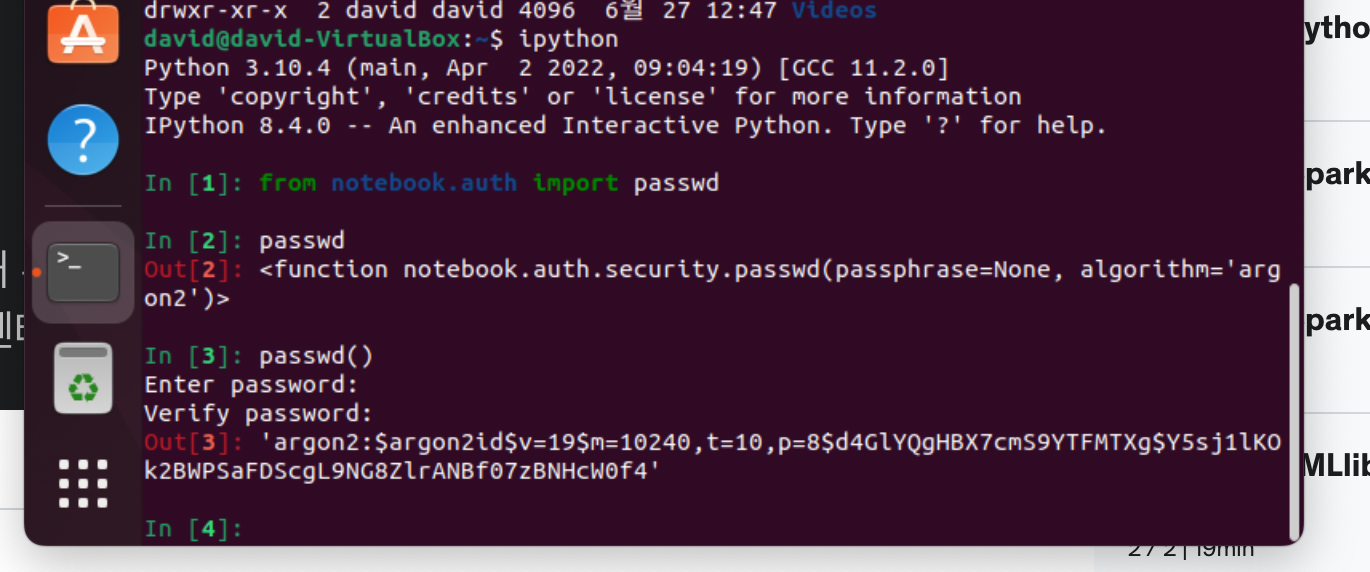

주피터 실행 에러 발생시 참고 출처: https://growingarchive.tistory.com/178

버츄얼박스 참고 https://til.younho9.dev/docs/etc/setting/mac-%EB%B2%84%EC%B6%94%EC%96%BC%EB%B0%95%EC%8A%A4-virtualbox-%EC%97%90-%EC%9A%B0%EB%B6%84%ED%88%AC-ubuntu-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0/

## 하둡 공부하기

* 고가용성 하둡 설치: https://www.youtube.com/watch?v=m-sRGtpWUEk

* 링크1  https://codedragon.tistory.com/9570#:~:text=%EC%8A%A4%ED%8C%8C%ED%81%AC(Spark),-%C2%B7%20%EC%8A%A4%ED%8C%8C%ED%81%AC(Spark)&text=%C2%B7%20%EC%8A%A4%ED%8C%8C%ED%81%AC%EB%8A%94%20%ED%95%98%EB%91%A1%EC%97%90%20%EC%9D%98%EC%A7%80,%EC%9D%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC%20%EC%97%B0%EC%82%B0%ED%95%A9%EB%8B%88%EB%8B%A4.

* 링크2  
https://velog.io/@cha-suyeon/%ED%95%98%EB%91%A1hadoop%EA%B3%BC-%EC%8A%A4%ED%8C%8C%ED%81%ACSpark#:~:text=%ED%95%98%EB%91%A1%EC%9D%80%20%EC%8A%A4%ED%8C%8C%ED%81%AC%EA%B0%80%20%EC%A0%9C%EA%B3%B5,%EC%9C%BC%EB%A1%9C%20%EB%8F%8C%EC%95%84%EA%B0%80%EB%8A%94%20%EA%B2%83%EC%9D%84%20%EC%B6%94%EC%B2%9C%ED%95%A9%EB%8B%88%EB%8B%A4.